In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats  

In [2]:
df = pd.read_csv('house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Select only the necessary columns
important_cols = [
    'SalePrice', 'LotArea', 'OverallQual', 'GrLivArea', 'GarageCars',
    'TotalBsmtSF', 'YearBuilt', 'Neighborhood', 'HouseStyle', 'MSZoning'
]

df = df[important_cols]  # Keep only selected columns

In [4]:
df.head()

,SalePrice,LotArea,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,Neighborhood,HouseStyle,MSZoning
0,208500,8450,7,1710,2,856,2003,CollgCr,2Story,RL
1,181500,9600,6,1262,2,1262,1976,Veenker,1Story,RL
2,223500,11250,7,1786,2,920,2001,CollgCr,2Story,RL
3,140000,9550,7,1717,3,756,1915,Crawfor,2Story,RL
4,250000,14260,8,2198,3,1145,2000,NoRidge,2Story,RL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   GrLivArea     1460 non-null   int64 
 4   GarageCars    1460 non-null   int64 
 5   TotalBsmtSF   1460 non-null   int64 
 6   YearBuilt     1460 non-null   int64 
 7   Neighborhood  1460 non-null   object
 8   HouseStyle    1460 non-null   object
 9   MSZoning      1460 non-null   object
dtypes: int64(7), object(3)
memory usage: 114.2+ KB


In [6]:
missing_values = df.isnull().sum().sort_values(ascending= False)
missing_values = missing_values[missing_values> 0]   # shows columns with missing values
print(missing_values)

Series([], dtype: int64)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0


### Detect Outliers using Boxplots

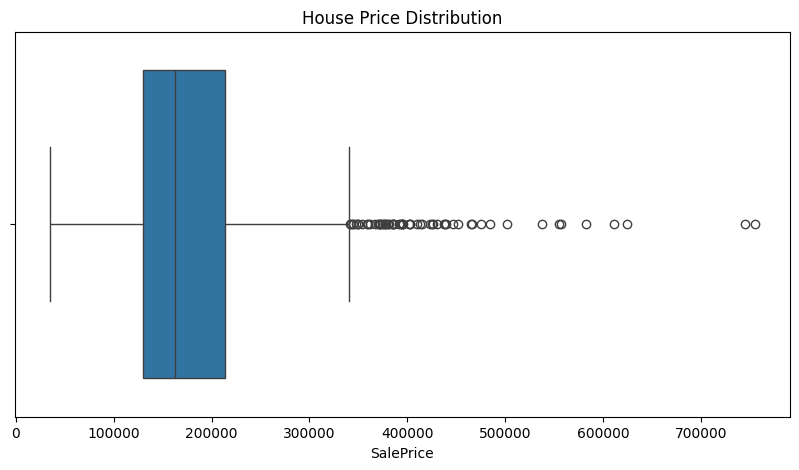

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['SalePrice'])
plt.title("House Price Distribution")
plt.show()

### Remove Outliers using Z-Score

In [11]:
z_scores = np.abs(stats.zscore(df['SalePrice']))
df = df[z_scores < 3]   # keep only values within 3 SD

### Univariate Analysis
#### Distribution Of Target Variable

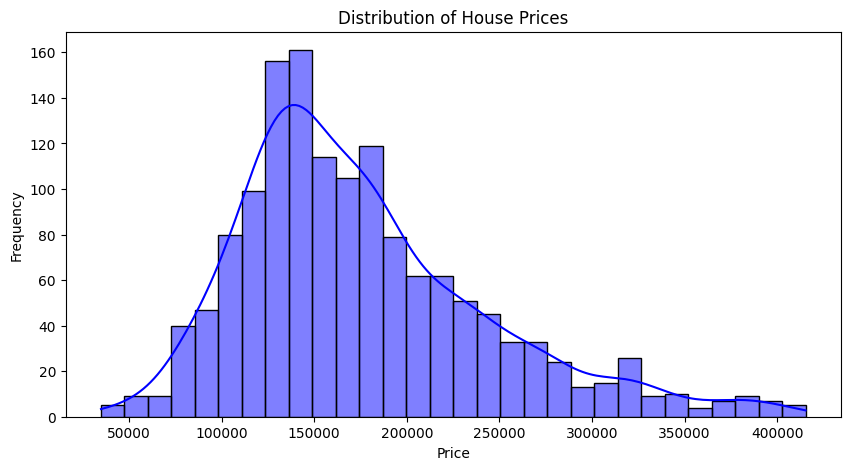

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30, color="blue")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [13]:
df['SalePrice'] = np.log1p(df['SalePrice'])   # Apply log transformation

C:\Users\sunny\AppData\Local\Temp\ipykernel_22704\2707917506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice'] = np.log1p(df['SalePrice'])   # Apply log transformation


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

In [21]:
df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

### Bivariate Analysis
#### Correlation Between Features

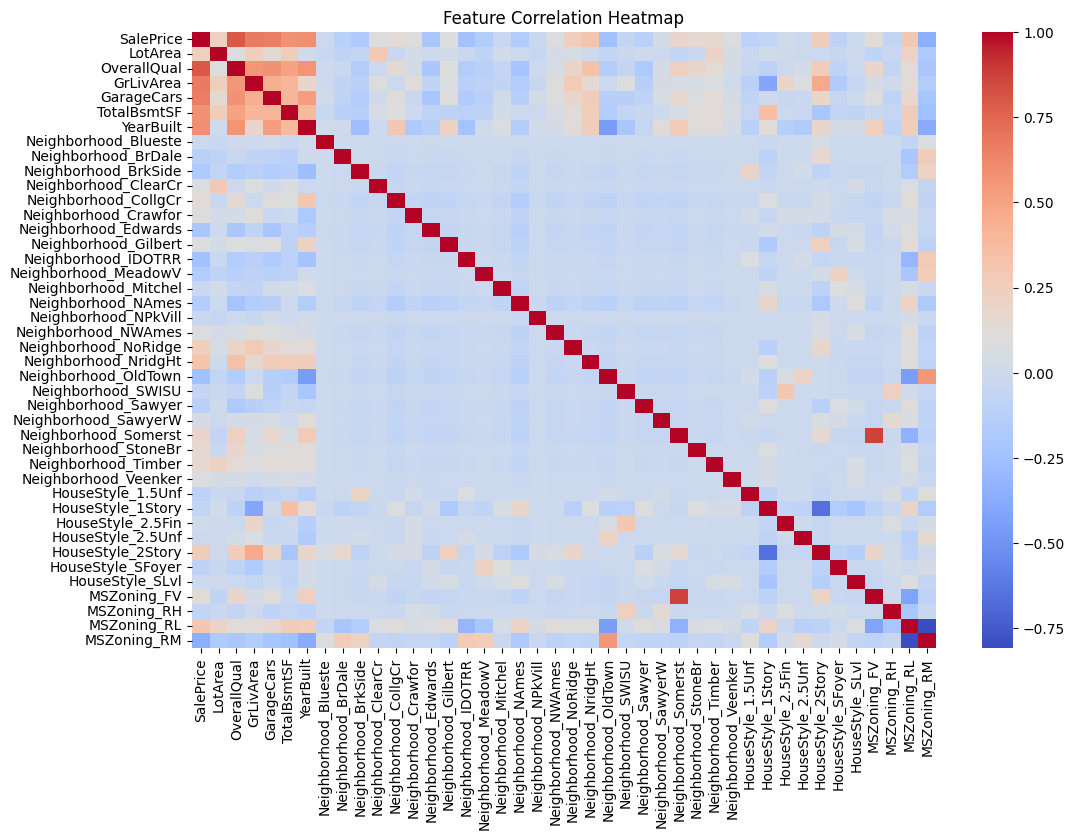

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


#### Scatter Plots of Top Features

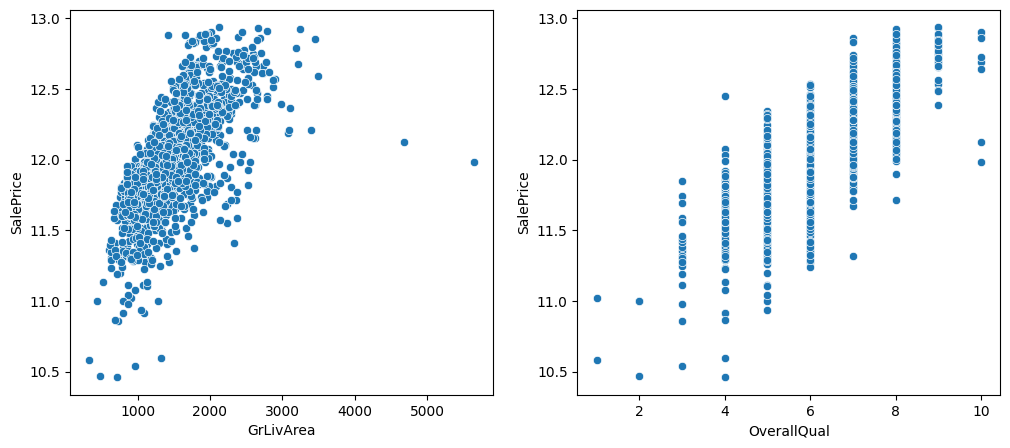

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', ax=axes[0])
sns.scatterplot(data=df, x='OverallQual', y='SalePrice', ax=axes[1])
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [25]:
# Define X (features) and y (target)
X = df[['GrLivArea', 'OverallQual', 'GarageCars']]
y = df['SalePrice']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")    # lower is better

Mean Absolute Error: 0.13


In [28]:
df.to_csv("cleaned_house_prices.csv", index=False)